In [1]:
from core.read_file import ReadFile
import pandas as pd
import matplotlib.pyplot as plt

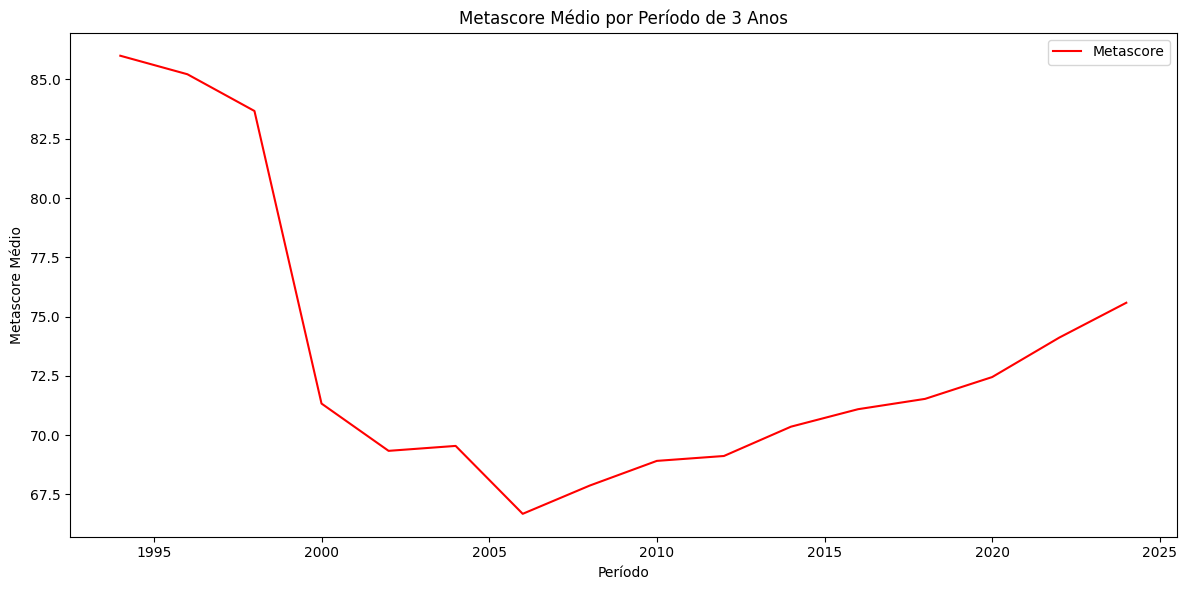

In [52]:
readFile: ReadFile = ReadFile()
    
if readFile.verify_path() == False:
    readFile.fetch_data('https://www.kaggle.com/api/v1/datasets/download/arnavtomar18/best-games-of-all-time')
    
    
data_set:pd.DataFrame = readFile.readCSV()
    
data_set['Launch_date'] = pd.to_datetime(data_set['Launch_date'])
data_set["Year"] = data_set['Launch_date'].dt.year
    

data_set['Periodo'] = (data_set['Year'] // 2) * 2
agrupado = data_set.groupby('Periodo')['Metascore'].mean().reset_index()

ax = agrupado.plot(
    kind='line', 
    y="Metascore", 
    x="Periodo", 
    figsize=(12, 6),
    color='red',
)

ax.set_title('Metascore Médio por Período de 3 Anos')
ax.set_xlabel('Período')
ax.set_ylabel('Metascore Médio')
plt.xticks(rotation=0)  # Sem rotação necessária
plt.tight_layout()

plt.show()

In [45]:
print((data_set['Year'] // 3)* 3) 

0        1998
1        1998
2        2007
3        2007
4        2010
         ... 
13829    2016
13830    2007
13831    2010
13832    2025
13833    2025
Name: Year, Length: 13834, dtype: int32
